In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('datasets/advertising.csv')

In [145]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [146]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [147]:
df.shape

(200, 4)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [149]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Checking Missing Values

In [150]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [151]:
# From above we can conclude tha there is no any missing values in the datset
# checking + or - correlation between the features
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

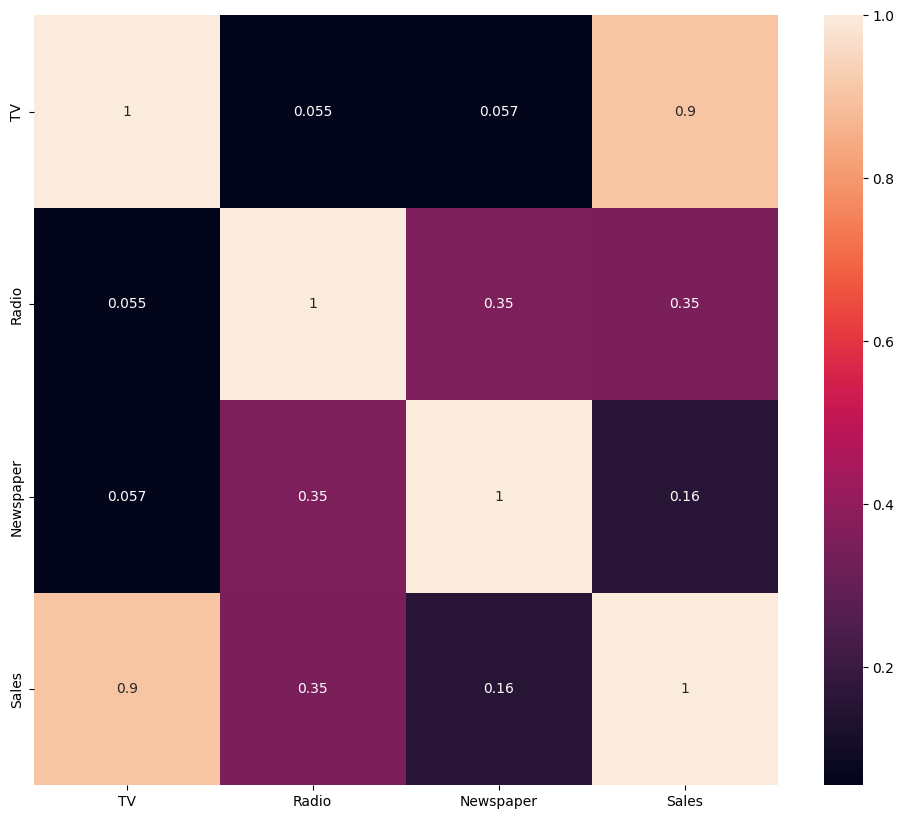

In [152]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

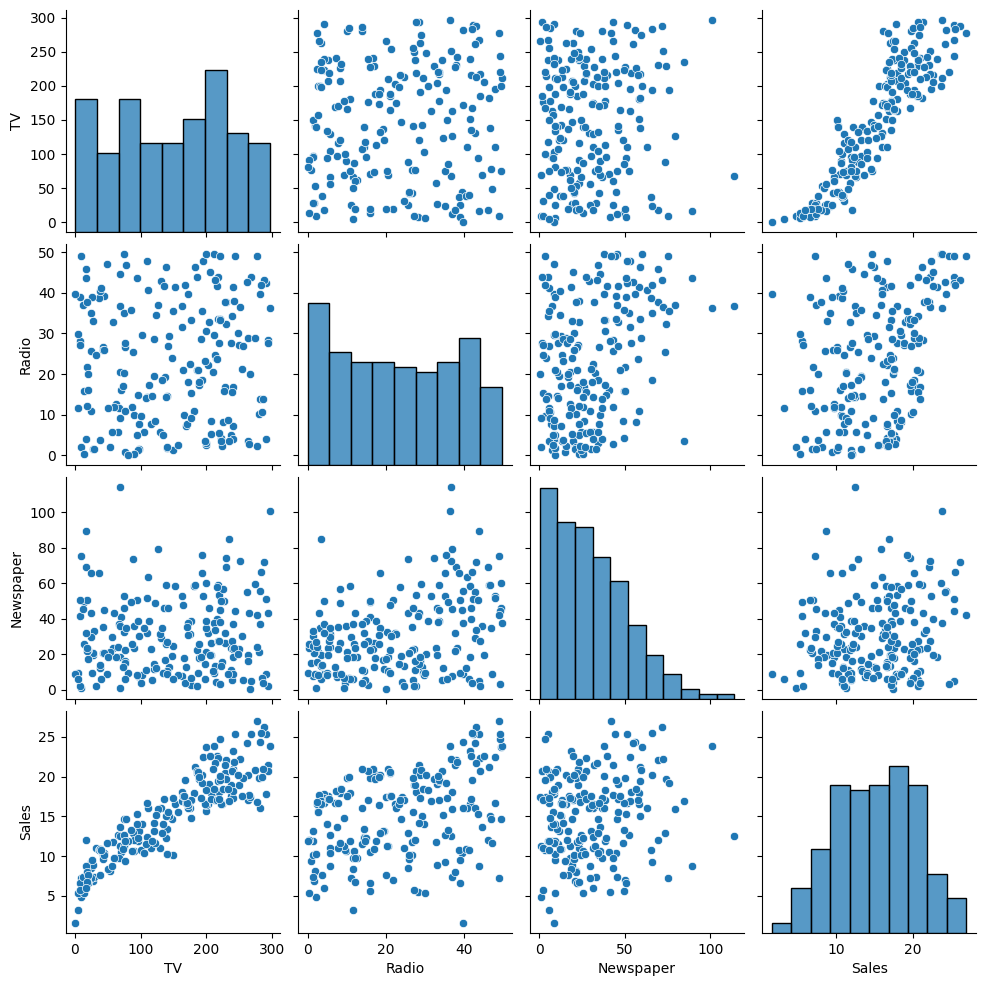

In [153]:
sns.pairplot(df)

<Axes: >

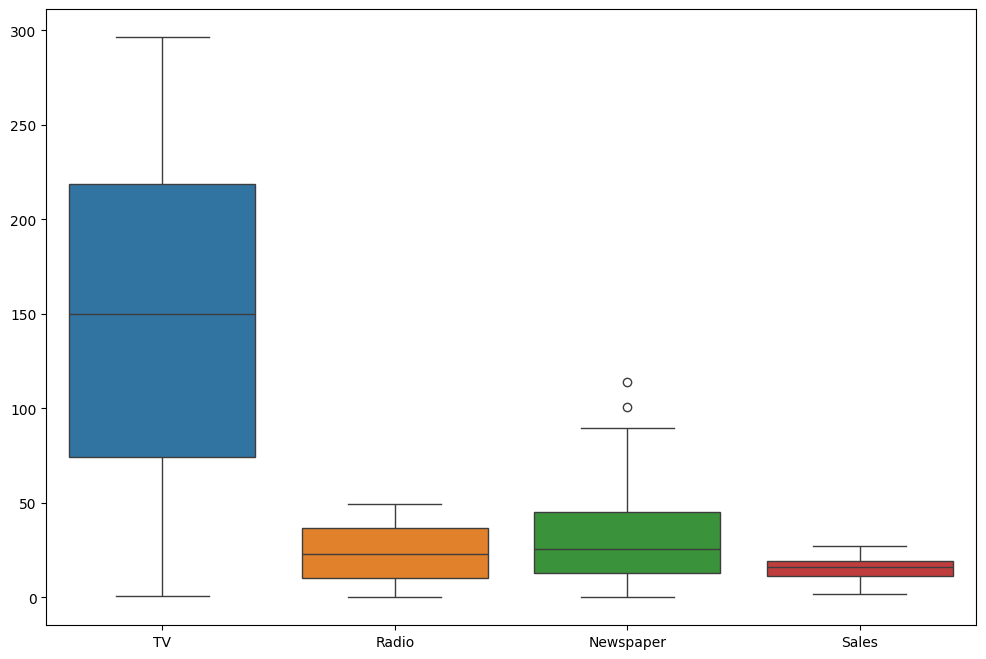

In [154]:
plt.subplots(figsize=(12,8))
sns.boxplot(data=df)

In [155]:
Q1 = df.Newspaper.quantile(0.25)
Q3 = df.Newspaper.quantile(0.75)
Q1,Q3

(12.75, 45.1)

In [156]:
IQR = Q3-Q1
IQR

32.35

In [157]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-35.775000000000006, 93.625)

In [158]:
df_clean_data = df[(df.Newspaper>lower_limit)&(df.Newspaper<upper_limit)]
df_clean_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: >

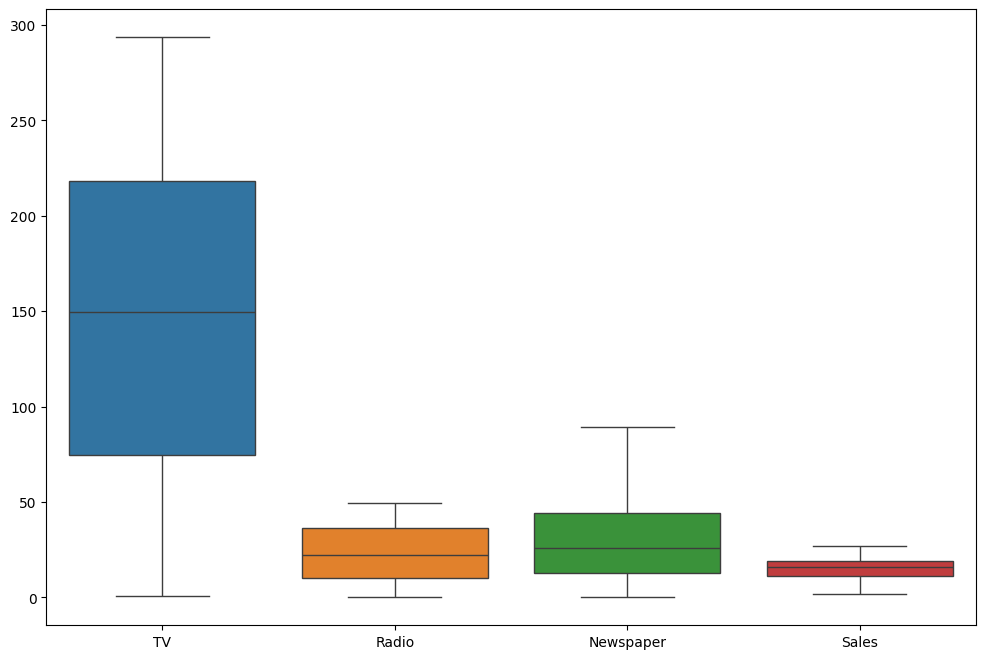

In [159]:
plt.subplots(figsize=(12,8))
sns.boxplot(data=df_clean_data)

## Independent and Dependent features

In [160]:
x = df_clean_data.iloc[:,:-1]  #Independent features
y = df_clean_data.iloc[:,-1]   #Dependent feature

In [161]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [162]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [163]:
# Train test split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)

In [164]:
x_train

,TV,Radio,Newspaper
52,216.4,41.7,39.6
170,50.0,11.6,18.4
39,228.0,37.7,32.0
32,97.2,1.5,30.0
98,289.7,42.3,51.2
...,...,...,...
108,13.1,0.4,25.6
14,204.1,32.9,46.0
93,250.9,36.5,72.3
181,218.5,5.4,27.4


In [165]:
y_train

52     22.6
170     8.4
39     21.5
32     13.2
98     25.4
       ... 
108     5.3
14     19.0
93     22.2
181    17.2
104    20.7
Name: Sales, Length: 138, dtype: float64

In [166]:
# checking for multicollinearity means feature should not be much correlated to the other feature
x_train.corr()

,TV,Radio,Newspaper
TV,1.000000,0.033738,0.107394
Radio,0.033738,1.000000,0.381660
Newspaper,0.107394,0.381660,1.000000


<Axes: >

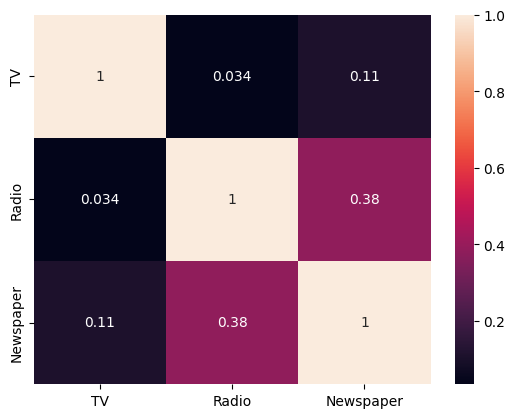

In [167]:
sns.heatmap(x_train.corr(),annot=True)

## Standardizaion Of dataset

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [169]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Model Training

In [170]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [171]:
regression.fit(x_train,y_train)

LinearRegression()

In [172]:
print("The slopes or coefficients of best fit line is:",regression.coef_)
print("The intercept:",regression.intercept_)

The slopes or coefficients of best fit line is: [4.53513837 1.51117625 0.28171709]
The intercept: 15.321739130434786


In [173]:
# Prediction for test data
y_pred = regression.predict(x_test)

In [174]:
y_pred

array([ 8.73969911, 13.75335674, 24.26389703, 11.16892835,  9.50004235,
       21.24519808, 20.14018828, 12.84035266, 15.05911045, 20.84351926,
       15.97502712, 20.46105223,  8.33229443, 13.96351058,  8.91254222,
       10.81480272,  9.56597467, 15.74521707,  9.81079412, 11.60048512,
       12.78415132, 17.05650468, 23.49039705,  7.0915867 , 18.56528679,
       20.87167705,  8.42400623, 18.53046438,  7.50501077, 14.88068637,
       18.7516656 , 14.02820959,  8.95890606, 13.14928652, 19.16988387,
       17.70215559, 16.80809561, 14.41227827, 19.68628284, 17.60911962,
       18.83005652, 10.94596006, 13.57079614, 10.35155019,  7.40156599,
        7.85517472, 16.56186863, 17.92963578, 10.24287104, 23.22758852,
       17.85870892, 16.77473452, 20.10467498,  7.15728689,  6.47057843,
       15.51181495, 11.82344571, 23.57266497, 13.38245303, 12.35015635])

## Performance Metrics

In [175]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

1.2161870225534057
2.4507719627368116
1.5654941592790474


## Accuracy 

In [176]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)


0.9151626818586047


In [177]:
# print adjusted R^2
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.9106178255296014


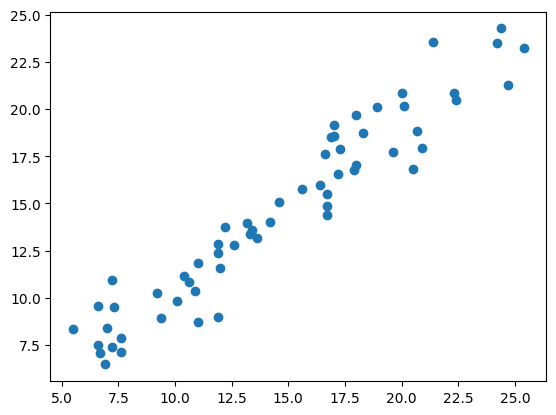

In [178]:
# Assumption
# plot a scatter  plot for prediction
plt.scatter(y_test,y_pred)

In [179]:
# Residuals
residuals = y_test-y_pred
residuals

66     2.260301
116   -1.553357
17     0.136103
143   -0.768928
158   -2.200042
128    3.454802
142   -0.040188
31    -0.940353
19    -0.459110
169   -0.843519
160    0.424973
15     1.938948
56    -2.832294
57    -0.763511
117    0.487458
46    -0.214803
126   -2.965975
9     -0.145217
149    0.289206
86     0.399515
115   -0.184151
163    0.943495
61     0.709603
189   -0.391587
74    -1.565287
69     1.428323
121   -1.424006
165   -1.630464
119   -0.905011
177    1.819314
70    -0.451666
77     0.171790
127    2.941094
83     0.450713
25    -2.169884
193    1.897844
97     3.691904
173    2.287722
20    -1.686283
152   -1.009120
139    1.869943
5     -3.745960
67    -0.170796
140    0.548450
106   -0.201566
172   -0.255175
99     0.638131
113    2.970364
12    -1.042871
36     2.172411
187   -0.558709
43     1.125265
68    -1.204675
195    0.442713
76     0.429422
96     1.188185
79    -0.823446
30    -2.172665
161   -0.082453
164   -0.450156
Name: Sales, dtype: float64

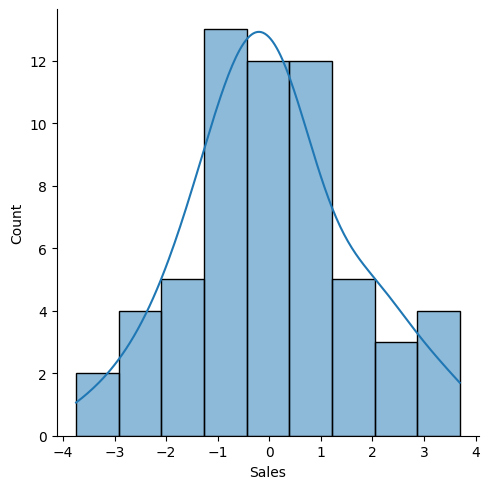

In [180]:
sns.displot(residuals,kde=True)

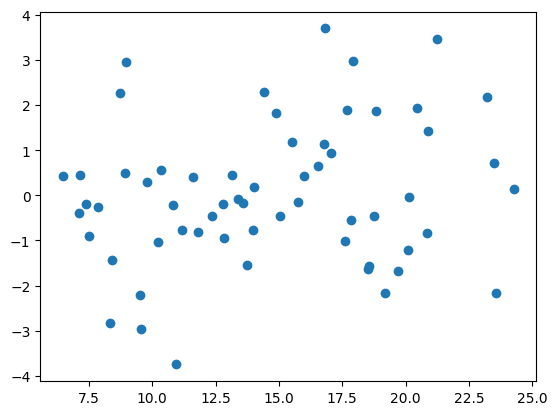

In [181]:
# scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred,residuals)

<Axes: >

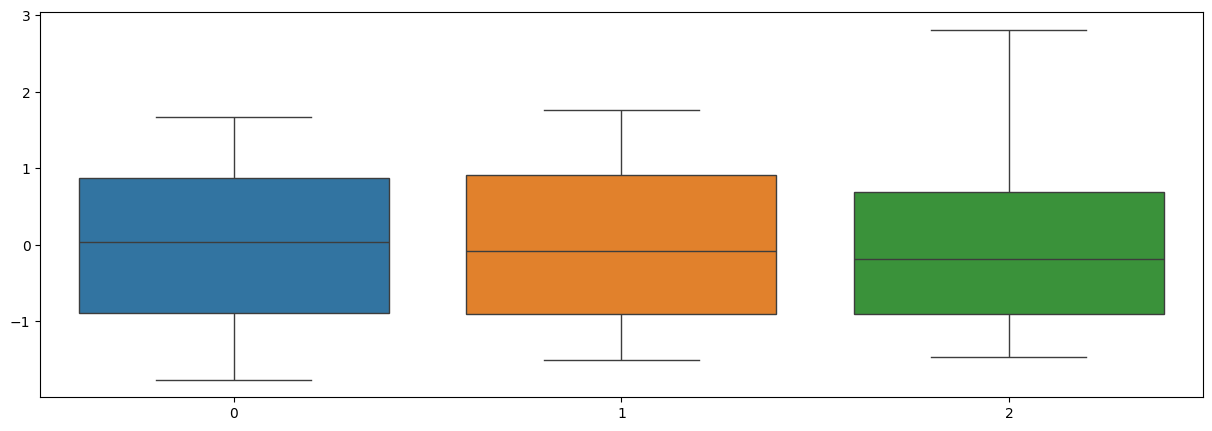

In [182]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=x_train)

In [183]:
x_train

array([[ 0.76807913,  1.23908448,  0.42482539],
       [-1.18416556, -0.75800892, -0.5912547 ],
       [ 0.90417311,  0.97369   ,  0.06057026],
       [-0.63040385, -1.42812996, -0.03528635],
       [ 1.6280523 ,  1.27889365,  0.98079374],
       [ 0.83847257, -1.30206758, -0.84527472],
       [ 1.67380804,  0.31020383, -1.38686458],
       [-1.56077046,  0.96705514, -0.43788412],
       [-0.88499345, -0.81108781, -1.18556569],
       [ 1.04613321, -0.41963097, -0.37557732],
       [ 0.50175729,  0.82108818,  2.15024441],
       [-1.43523549, -1.42812996,  0.10849857],
       [ 1.51659603, -0.85753184, -0.44746978],
       [-1.56898303,  1.51774867,  1.84829608],
       [ 1.04378677,  1.22581475, -0.58646187],
       [ 1.44033647,  0.38982217,  1.38818434],
       [ 0.30582888, -0.91061074, -1.16639437],
       [-1.33785791,  1.03340376,  1.67096135],
       [-0.89437924,  1.74996883,  0.71718806],
       [ 0.92177147,  0.61540747,  2.08314478],
       [ 0.90769278, -0.40636124, -0.217

In [184]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train,y_train)

LassoCV(cv=5)

In [185]:
lassocv.predict(x_test)

array([ 8.76666911, 13.76255624, 24.22523775, 11.18496299,  9.50505037,
       21.2298523 , 20.12116858, 12.84615043, 15.06364695, 20.84230096,
       15.97514335, 20.43044522,  8.34499632, 13.97356731,  8.94335397,
       10.829749  ,  9.56813391, 15.75508051,  9.82790738, 11.61390529,
       12.77852929, 17.05519864, 23.45302065,  7.11992783, 18.56248292,
       20.85060384,  8.43561146, 18.50991151,  7.5312137 , 14.88588472,
       18.7369775 , 14.03551282,  8.99189835, 13.14531283, 19.17100684,
       17.69858605, 16.80806204, 14.42699467, 19.66494089, 17.60892028,
       18.82349481, 10.93204164, 13.58591988, 10.37325653,  7.42724103,
        7.88083678, 16.54625663, 17.9308462 , 10.23917318, 23.20830379,
       17.85442012, 16.77787709, 20.09749702,  7.19200447,  6.50540923,
       15.52744151, 11.84106539, 23.54452349, 13.37617782, 12.37013951])

In [186]:
lassocv.alpha_

0.01314760792921807

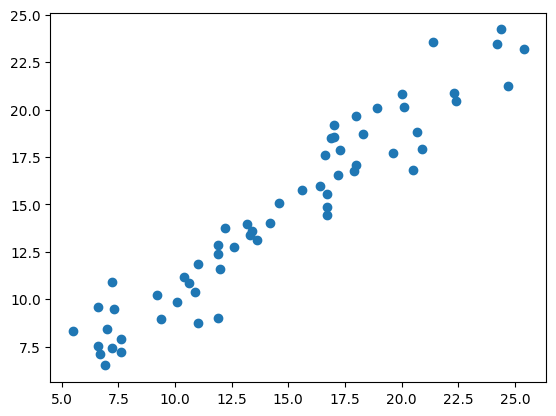

In [187]:
y_pred = lassocv.predict(x_test)
plt.scatter(y_test,y_pred)

In [188]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Score:",score)

Mean Absolute Error: 1.2169573737161818
Mean Squared Error: 2.448822240513214
Score: 0.9152301745535946


Mean Absolute Error: 1.2170157541413846
Mean Squared Error: 2.4540861850197198
Score: 0.9150479548523873


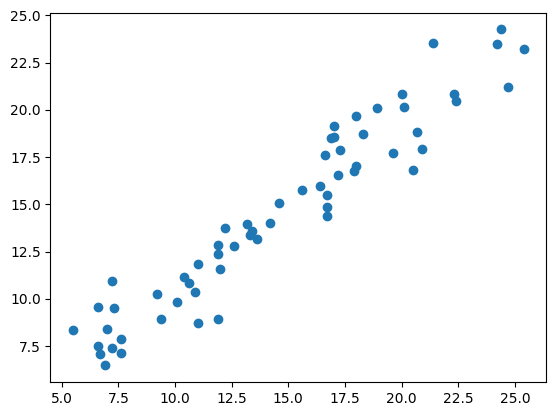

In [189]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(x_train,y_train)
y_pred = ridgecv.predict(x_test)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Score:",score)

## Usin SVR

In [190]:
from sklearn.svm import SVR

In [191]:
svr = SVR()

In [192]:
svr.fit(x_train,y_train)

SVR()

In [193]:
y_pred = svr.predict(x_test)

In [194]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8493749640140069
1.5720973946524635


In [195]:
# Hyper parameter Tuning with SVR
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [196]:
grid = GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [197]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.228 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.053 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.219 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.157 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.132 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.359 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.171 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.330 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.285 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.277 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.071 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [198]:
grid_predict = grid.predict(x_test)

In [199]:
# Higher Accuracy than Linear Regression 
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_predict))
print(mean_absolute_error(y_test,grid_predict))

0.9376436631198756
0.9275182796821125
